# Text classification with Naive Bayes classifier

In [7]:
# Data loading
from sklearn.datasets import fetch_20newsgroups

#Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

#Model/Estimators
from sklearn.naive_bayes import MultinomialNB

#Pipeline utility
from sklearn.pipeline import Pipeline, make_pipeline

#Model evaluation
from sklearn.metrics import ConfusionMatrixDisplay

#Plotting
import matplotlib.pyplot as plt

## Dataset

In [2]:
data = fetch_20newsgroups()

In [3]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

There are 20 categories in the dataset. For simplicity, we will select 4 of these categories

In [4]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [5]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



## Data preprocessing and modelling

In [8]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [9]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

## Model evaluation

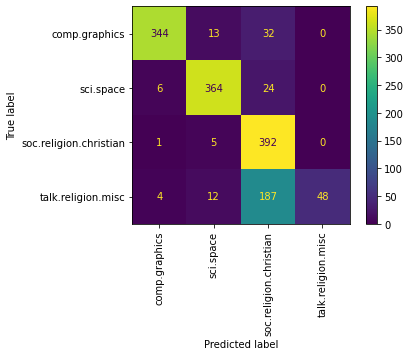

In [10]:
ConfusionMatrixDisplay.from_estimator(model,
                                        test.data, test.target,
                                        display_labels = test.target_names,
                                        xticks_rotation='vertical')

plt.show()

## Using the Model

In [11]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]


In [12]:
predict_category('sending a payload to the ISS')

'sci.space'

In [13]:
predict_category('discussing hinduism vs atheism')

'soc.religion.christian'

In [14]:
predict_category('detemining the screen resolution')

'comp.graphics'